<a href="https://colab.research.google.com/github/Travistyse/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












------------------------

Step one is to import all of the modules I need, register the matplotlib converters, adjust pandas' display options, and set a random seed

In [0]:
# Your Work Here
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from IPython.display import display, Image
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.options.display.max_rows = 999
pd.options.display.max_columns = 100

np.random.seed(314159)

Next up I want to set up the example image so I can display it whenever I need to reference and compare it against my own graph.

In [2]:
url = 'https://fivethirtyeight.com/wp-content/uploads/2019/10/Mehta-Media1028-1028-1.png?w=575'
example = Image(url = url, width = 400)
display(example)

Time to bring in my data for the graphs

In [0]:
online_weekly = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/online_weekly.csv')
cable_weekly = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/cable_weekly.csv')


In [4]:
online_weekly.head(3)

,date,name,matched_stories,all_candidate_stories,pct_of_all_candidate_stories,query
0,2018-12-30,Amy Klobuchar,45.0,806,0.055831,"(""Amy Klobuchar"")"
1,2019-01-06,Amy Klobuchar,55.0,915,0.060109,"(""Amy Klobuchar"")"
2,2019-01-13,Amy Klobuchar,128.0,1052,0.121673,"(""Amy Klobuchar"")"


In [5]:
cable_weekly.head(3)

,date,name,matched_clips,all_candidate_clips,total_clips,pct_of_all_candidate_clips,query
0,2018-12-30,Amy Klobuchar,12,1279,76029,0.009382,"(""Amy Klobuchar"") (station:MSNBC OR station:CN..."
1,2019-01-06,Amy Klobuchar,7,1031,82964,0.006790,"(""Amy Klobuchar"") (station:MSNBC OR station:CN..."
2,2019-01-13,Amy Klobuchar,45,615,82521,0.073171,"(""Amy Klobuchar"") (station:MSNBC OR station:CN..."


This isn't a great format for how I want to do this so I'm going to convert these to wide format.

In [6]:
names = cable_weekly['name'].unique()

wide_c = cable_weekly.pivot_table(index='date', columns='name',
                                values='matched_clips')
wide_c.head(3)

name,Amy Klobuchar,Andrew Yang,Bernie Sanders,Beto O'Rourke,Bill de Blasio,Cory Booker,Elizabeth Warren,Eric Swalwell,Jay Inslee,Joe Biden,Joe Sestak,John Delaney,John Hickenlooper,Julian Castro,Kamala Harris,Kirsten Gillibrand,Marianne Williamson,Michael Bennet,Mike Gravel,Pete Buttigieg,Seth Moulton,Steve Bullock,Tim Ryan,Tom Steyer,Tulsi Gabbard
date,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-30,12.0,0.0,246.0,101.0,2.0,39.0,721.0,31.0,4.0,177.0,0.0,5.0,1.0,5.0,74.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,12.0,0.0
2019-01-06,7.0,0.0,134.0,127.0,23.0,15.0,424.0,22.0,7.0,183.0,0.0,2.0,1.0,68.0,99.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0
2019-01-13,45.0,0.0,70.0,78.0,25.0,31.0,105.0,19.0,0.0,104.0,0.0,5.0,0.0,48.0,64.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,28.0


Now I'm going to fill up some lists with the data I'll need - more specifically, I'm going to need all of Biden's data in one list and whomever the leading candidate for the week is - ignoring Biden - so that I can graph that data.

In [0]:
ru = [] # Name of Runner Up
ru_m = [] # Number of mentions said runner up has for that week
biden = [] # Name of Runner Up

for entry in range( len(wide_c) ): # All entries
  runner_up_index = -1
  runner_up_mentions = -1

  for cand_name_index in range(len(wide_c.iloc[entry])): # Mentions per candidate
    if cand_name_index == 9: # If candidate is Biden
      biden.append(wide_c.iloc[entry, cand_name_index]) # Add it to the Biden list
      continue # Thank you, nEXt! (Skip and keep looping)
    else:
      num_mentions = wide_c.iloc[entry, cand_name_index] # Store mentions in local var
      if num_mentions > runner_up_mentions: # If this is most mentions thus far
        runner_up_mentions = num_mentions # New high score!
        runner_up_index = cand_name_index # New high score name! (:
      
  # End of the candidate loop, time to check my counters

  ru.append(names[runner_up_index])
  ru_m.append(runner_up_mentions)

Now I need to repeat this for the online data

In [8]:
wide_o = online_weekly.pivot_table(index='date', columns='name',
                                values='matched_stories')
wide_o.head(3)

name,Amy Klobuchar,Andrew Yang,Bernie Sanders,Beto O'Rourke,Bill de Blasio,Cory Booker,Elizabeth Warren,Eric Swalwell,Jay Inslee,Joe Biden,Joe Sestak,John Delaney,John Hickenlooper,Julian Castro,Kamala Harris,Kirsten Gillibrand,Marianne Williamson,Michael Bennet,Mike Gravel,Pete Buttigieg,Seth Moulton,Steve Bullock,Tim Ryan,Tom Steyer,Tulsi Gabbard
date,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-30,45.0,2.0,277.0,43.0,46.0,96.0,443.0,27.0,24.0,158.0,0.0,38.0,10.0,47.0,138.0,63.0,1.0,2.0,0.0,8.0,11.0,6.0,27.0,41.0,17.0
2019-01-06,55.0,6.0,329.0,61.0,80.0,132.0,321.0,12.0,37.0,162.0,0.0,51.0,10.0,118.0,236.0,68.0,1.0,7.0,0.0,3.0,3.0,10.0,10.0,65.0,91.0
2019-01-13,128.0,9.0,250.0,55.0,66.0,131.0,325.0,32.0,26.0,117.0,1.0,41.0,9.0,159.0,220.0,258.0,2.0,5.0,0.0,19.0,12.0,10.0,40.0,23.0,171.0


In [0]:
o_ru = [] # Name of Runner Up
o_ru_m = [] # Number of mentions said runner up has for that week
o_biden = [] # Number of mentions biden had that week

for entry in range( len(wide_o) ): # All entries
  runner_up_index = -1
  runner_up_mentions = -1

  for cand_name_index in range(len(wide_o.iloc[entry])): # Mentions per candidate
    if cand_name_index == 9: # If candidate is Biden
      o_biden.append(wide_o.iloc[entry, cand_name_index]) # Add it to the Biden list
      continue # Thank you, nEXt! (Skip and keep looping)
    else:
      num_mentions = wide_o.iloc[entry, cand_name_index] # Store mentions in local var
      if num_mentions > runner_up_mentions: # If this is most mentions thus far
        runner_up_mentions = num_mentions # New high score!
        runner_up_index = cand_name_index # New high score name! (:
      
  # End of the candidate loop, time to check my counters

  o_ru.append(names[runner_up_index])
  o_ru_m.append(runner_up_mentions)

Now I need to get an easily sortable list of the dates so that I can sort these. It's actually not necessary - it's just what I'm choosing to do.

I'm also going to create a new list which contains the calculations for how many MORE entries Biden had than the weekly runner up in a percentage format - ie 5x more would be 25 Biden, 5 Runner up.

And finally I'm going to remove all of the irrelevant entries from the graph - the stuff that happens before the graph begins. I should've grabbed those from the beginning but I found it easier to iterate by looking at the list first and, given that this is just a one-shot assignment, I don't want to spend too much time making my loops perfect when I can just drop the irrelevant data.

In [0]:
updated_dates = pd.to_datetime(cable_weekly['date'].unique(), infer_datetime_format=True)

online_graph = []
cable_graph = []

for entry in range( len(o_biden) ): #Runs 43 times
  online_graph.append(o_biden[entry] / o_ru_m[entry])
  cable_graph.append(biden[entry] / ru_m[entry])

cable_graph = cable_graph[16:]
online_graph = online_graph[16:]
updated_dates = updated_dates[16:]

And now the massive final frontier - graphing it all. This is 99% just iteration and avoiding the text from looking too smudged due to font scaling and non-perfect pixel location. I can make it look better by adding in the arrow and drawing white rectangles behind the text to cover up the graphs - and depending on scope, adding the source below the image.

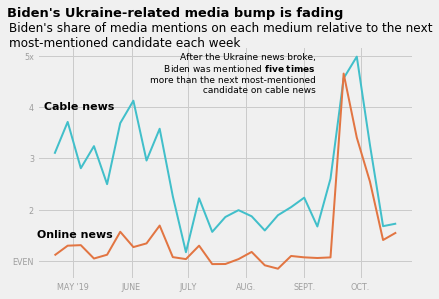

In [14]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
#fig.set_figheight(12)
#fig.set_figwidth(10.31)


ax.plot(updated_dates, cable_graph, color='#41BFCA', linewidth = 2) # First bc on top overlap
ax.plot(updated_dates, online_graph, color='#E27542', linewidth = 2)

ax.set_snap(True)
ax.set_xticklabels(["MAY '19", "JUNE", "JULY", "AUG.", "SEPT.", "OCT."], fontweight = 0, fontsize = 8, color = '#9E9E9E')
ax.set_yticklabels(["uh", "EVEN", "2", "3", "4", "5x"], fontweight = 0, fontsize = 8, color = '#9E9E9E') # "uh" = bug

ax.set_title("Biden's Ukraine-related media bump is fading",
             fontsize = 13, fontweight = 600, x = .367, y = 1.1)

ax.text(s = "Biden's share of media mentions on each medium relative to the next\nmost-mentioned candidate each week",
        y = 1, snap=True, x = -.077, fontsize = 12, ma='left', fontweight = 0, transform=ax.transAxes)


ax.text(s ='Cable news',
        x = 0.018 , y = .73, fontsize = 11, fontweight = 600, transform=ax.transAxes)

ax.text(s ='Online news',
        x = 0.0 , y = .18, fontsize = 11, fontweight = 600, transform=ax.transAxes)


ax.text(s = 'After the Ukraine news broke,\n Biden was mentioned ' + r"$\bf{" + 'five ' +"}$" +' ' + r"$\bf{" + ' times' +"}$" + "\nmore than the next most-mentioned\n candidate on cable news",
        x = .3, y = .8, fontsize = 9, fontweight = 350, transform=ax.transAxes,
        ma='right')

# It's just a straight arrow sooo.. not helpful
#ax.arrow(.5, .5, 15, 15, transform=ax.transAxes)

fig.show()

In [12]:
example

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here